# External perturbations

The following example shows how the addition of an external perturbation modifies the properties of a  NIS model. The external shear is added by summing the potential

$$
\Psi_\gamma=\frac{1}{2}\gamma_1(x_1^2-x_2^2)+\gamma_2x_1x_2
$$

to the potential of the NIS.

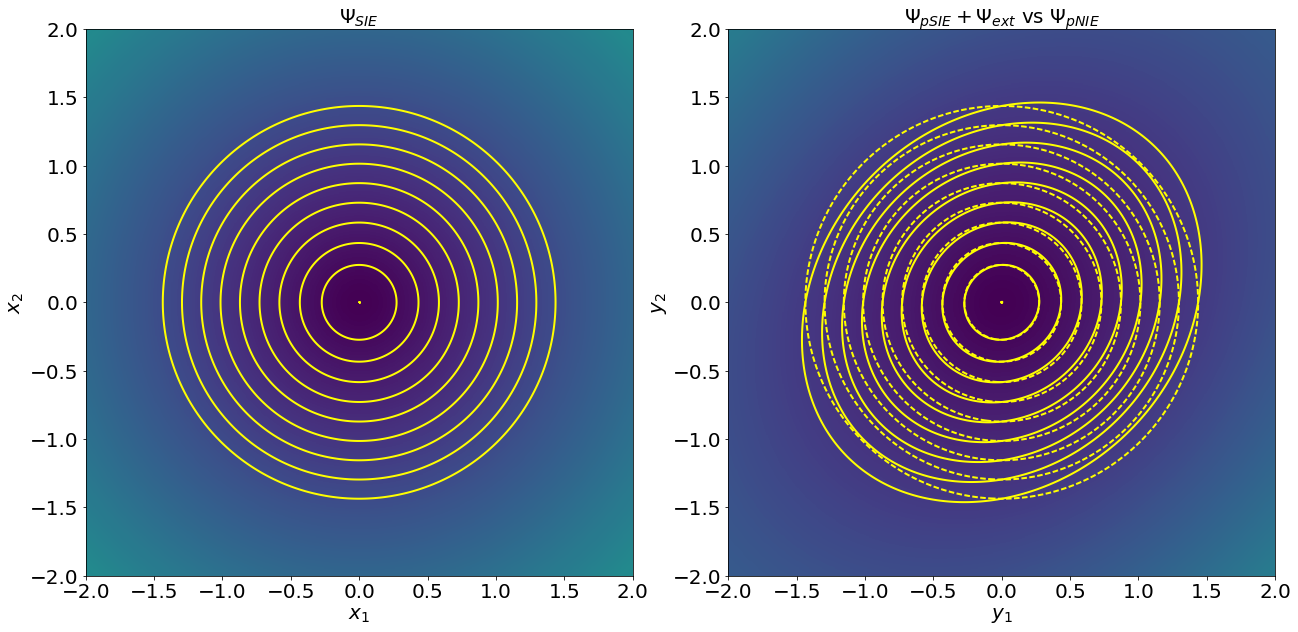

In [131]:
from mynewdeflector import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm, PowerNorm, SymLogNorm
%matplotlib inline

size=8.0
npix=1024
xmin=-size/2.0
ymin=xmin
xmax=-xmin
ymax=xmax

def psi_extg(xk,yk,g1,g2):
    x1_,x2_=np.meshgrid(xk,yk) # lens plane mesh
    psi_g=g1/2.0*(x1_**2-x2_**2)+g2*x1_*x2_
    return(psi_g)

f=1.0 
xc=0.1
#xmin=-4
#xmax=4
#ymin=-4
#ymax=4
npix=1024
'''
the angle phi_g defines the direction of the shear
'''
phi_g=45.0
'''
g is the amplitude of the shear
'''
g=0.1
'''
g1, g2 are the two components of g
'''
g1=-g*np.cos(2.0*phi_g*np.pi/180.0)
g2=-g*np.sin(2.0*phi_g*np.pi/180.0)

xk=np.linspace(xmin,xmax,npix)
yk=np.linspace(ymin,ymax,npix)

kwargs={'theta_c': 0.2, 'norm': 0.8, 'ell': 0.0}
size=xmax-xmin
el=psie(size=size,npix=npix,**kwargs)

psi_ext=psi_extg(xk,yk,g1,g2)

'''
Let's compare to the potentia of a NIE model
'''
kwargs={'theta_c': 0.2, 'norm': 0.8, 'ell': 0.1}
el_comp=psie(size=size,npix=npix,**kwargs)
psi_comp=el_comp.pot

fig,ax=plt.subplots(1,2,figsize=(18,10))
ax[0].imshow(el.pot,origin='low',extent=[xmin,xmax,ymin,ymax])
levels=np.linspace(np.min(el.pot),np.min(el.pot)+1,10)
cst=ax[0].contour(el.pot,levels=levels,colors='yellow',linewidths=2,extent=[xmin,xmax,ymin,ymax])
ax[1].imshow(el.pot+psi_ext,origin='low',extent=[xmin,xmax,ymin,ymax])

cst=ax[1].contour(el.pot+psi_ext,levels=levels,colors='yellow',linewidths=2,extent=[xmin,xmax,ymin,ymax])
cst=ax[1].contour(el.pot,linestyles='dashed',levels=levels,colors='yellow',linewidths=2,extent=[xmin,xmax,ymin,ymax])
ax[0].set_xlim([-2,2])
ax[0].set_ylim([-2,2])
ax[1].set_xlim([-2,2])
ax[1].set_ylim([-2,2])

for i in range(2):
    ax[i].xaxis.set_tick_params(labelsize=20)
    ax[i].yaxis.set_tick_params(labelsize=20)
    ax[i].set_aspect('equal')
    
ax[0].set_xlabel('$x_1$',fontsize=20)
ax[0].set_ylabel('$x_2$',fontsize=20)
ax[1].set_xlabel('$y_1$',fontsize=20)
ax[1].set_ylabel('$y_2$',fontsize=20)    

ax[0].set_title(r'$\Psi_{SIE}$',fontsize=20)
ax[1].set_title(r'$\Psi_{pSIE}+\Psi_{ext}$ vs $\Psi_{pNIE}$',fontsize=20)
plt.tight_layout()

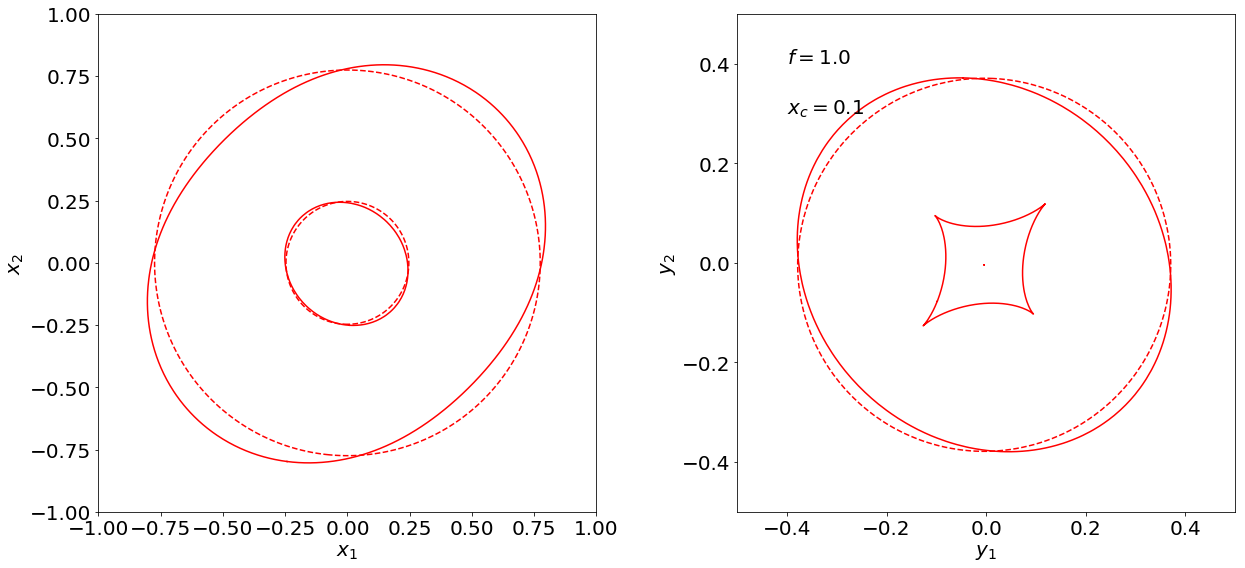

In [2]:
fig,ax=plt.subplots(1,2,figsize=(18,8))
el.clines(ax=ax[0])
el.caustics(lt='--',ax=ax[1])

pixel=size/(npix-1)
pert_el=deflector_from_potential(el.pot+psi_ext,
                                 size=size,npix=npix)

pert_el.clines(ax=ax[0])
ax[0].contour(el.detA(),linestyles='dashed',levels=[0.0],
              extent=[xmin,xmax,ymin,ymax],
            colors='red')
pert_el.caustics(ax=ax[1])

        
ax[1].set_xlim([-0.5,0.5])
ax[1].set_ylim([-0.5,0.5])
ax[0].set_xlim([-1,1])
ax[0].set_ylim([-1,1])
                      
ax[0].set_xlabel('$x_1$',fontsize=20)
ax[0].set_ylabel('$x_2$',fontsize=20)
ax[1].set_xlabel('$y_1$',fontsize=20)
ax[1].set_ylabel('$y_2$',fontsize=20)
for i in range(2):
    ax[i].xaxis.set_tick_params(labelsize=20)
    ax[i].yaxis.set_tick_params(labelsize=20)
    ax[i].set_aspect('equal')

ax[1].text(-0.4,0.4,'$f=$'+str(f),fontsize=20)
ax[1].text(-0.4,0.3,'$x_c=$'+str(xc),fontsize=20)
plt.tight_layout()

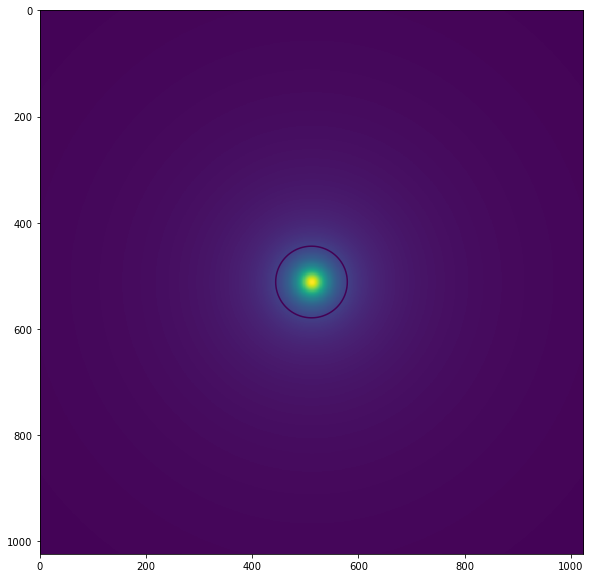

In [135]:
fig,ax=plt.subplots(1,1,figsize=(10,10))
psi=el.pot+psi_ext
a2,a1=np.gradient(psi)
a21,a11=np.gradient(a1)
a22,a12=np.gradient(a2)

kappa=0.5*(a11+a22)

ax.imshow(kappa)
ax.contour(kappa,levels=[np.max(kappa)/5])

# Substructures

Lenses generally contain substructures. How can we model them. The method is simple: substructures are lenses within other lenses. Given their small scale, however their effect is local. In particular, in case of multiple images appearing at large distances from each other, one substructure may affect only one of the images (i.e. the image probing the line-of-sight which has a small impact parameter with the substructure.

The inclusion of substructure into an extended lens model consists of summing up the potential or the deflection fields of the substructures themselves with that of the main lens.

Here is an example. We generate a number of substructures to be randomly distributed on the top of a NIE model. These substructures are scaled-down versions of the lens within which they are distributed.

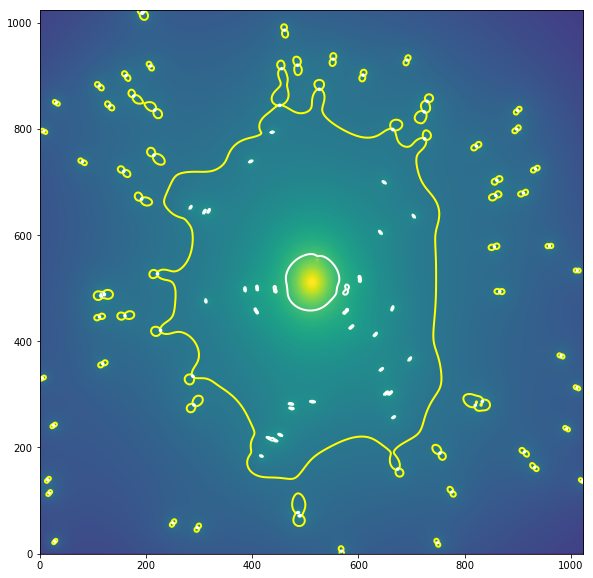

In [32]:
"""
Main lens:
"""
kwargs={'theta_c': 5.0, 'norm': 30.0, 'ell': 0.1}
size=200.0
npix=1024.0
main_lens=psie(size=size,npix=npix,**kwargs)

"""
substructures
"""
n_pert=100

xsub=(np.random.random_sample(n_pert)-0.5)*size
ysub=(np.random.random_sample(n_pert)-0.5)*size

fsub=np.random.random_sample(n_pert)
pa=np.random.random_sample(n_pert)*2.0*np.pi

pot=main_lens.pot
for i in range(n_pert):
    kwargs={'theta_c': 0.0, 'norm': 0.5, 'ell': 0.0, 'pa': pa[i]}
    sub_lens=psie(x0=xsub[i],y0=ysub[i],size=size,npix=npix,**kwargs)
    pot=pot+sub_lens.pot

df=deflector_from_potential(pot=pot,size=size,npix=npix)

fig,ax=plt.subplots(1,1,figsize=(10,10))
ax.imshow(df.convergence(),origin='low',norm=LogNorm())
g1,g2=df.shear()
lambdat=1.0-df.convergence()-np.sqrt(g1*g1+g2*g2)
lambdar=1.0-df.convergence()+np.sqrt(g1*g1+g2*g2)
cst=ax.contour(lambdat,levels=[0.0],colors='yellow',linewidths=2)
ax.imshow(lambdar,origin='low',alpha=0)
csr=ax.contour(lambdar,levels=[0.0],colors='white',linewidths=2)

As we can see, smaller, secondary critical lines appear around substructures in addition to the longer critical line surrounding the main lens. In addition,  those substructures that are close to the main critical line produce resonant critical lines (secondary critical lines merging with the main one). Obviously, the caustic structure will  also be affected by the substructures.

What kind of signatures do we expect in the images of background sources? We can consider few examples.

In the first, we consider a source near the cusp of the tangential caustic of a large lens (e.g. a galaxy cluster). In the case of a smooth lens, we'd expect to observe a large  tangential arc. However, if the main caustic is locally perturbed by a substructure then additional local curvatures may be appear in the arc, which could  also be  shifted away.  

0.0740487397465
3943591.00482 686177.459216


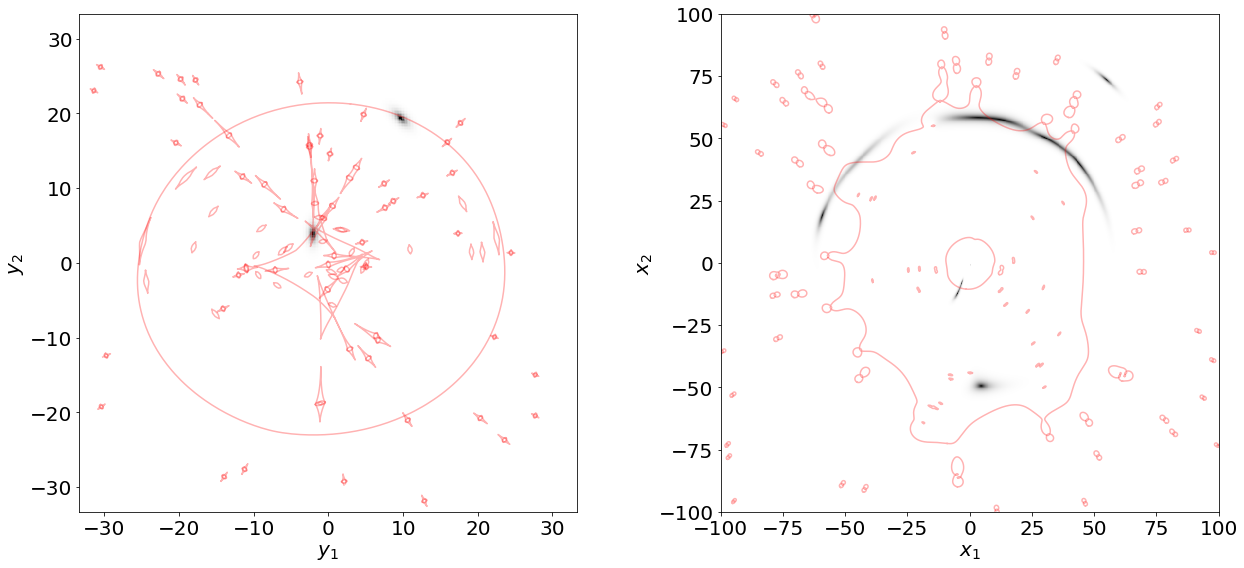

In [129]:
%matplotlib inline
renorm=main_lens.convergence().sum()/df.convergence().sum()
print (renorm)
kwargs={'theta_c': 5.0, 'norm': 30.0/renorm, 'ell': 0.1}
main_lens=psie(size=size,npix=npix,**kwargs)
print (main_lens.convergence().sum(),df.convergence().sum())

fig,ax=plt.subplots(1,2,figsize=(18,8))
#main_lens.clines(ax=ax[0])
#main_lens.caustics(lt='--',ax=ax[1],color='blue')


df.clines(ax=ax[1],alpha=0.3)
#ax[0].contour(main_lens.detA(),linestyles='dashed',levels=[0.0],
#              extent=[-size/2.,size/2.,-size/2.,size/2.],
#            colors='blue')
df.caustics(ax=ax[0],alpha=0.3)

        
ax[0].set_xlim([-size/6.,size/6.])
ax[0].set_ylim([-size/6.,size/6.])
ax[1].set_xlim([-size/2.,size/2.])
ax[1].set_ylim([-size/2.,size/2.])
                      
ax[1].set_xlabel('$x_1$',fontsize=20)
ax[1].set_ylabel('$x_2$',fontsize=20)
ax[0].set_xlabel('$y_1$',fontsize=20)
ax[0].set_ylabel('$y_2$',fontsize=20)
for i in range(2):
    ax[i].xaxis.set_tick_params(labelsize=20)
    ax[i].yaxis.set_tick_params(labelsize=20)
    ax[i].set_aspect('equal')

kwargs={'q': 0.5,'re': 1.0, 'pa': np.pi, 'n': 1,'ys1': -2.0, 'ys2': 3.9}
se_unlensed=sersic(size,npix,**kwargs)
se=sersic(size,npix,gl=df,**kwargs)

image_lensed=se.image
image_unlensed=se_unlensed.image
#fig,ax=plt.subplots(1,2,figsize=(18,8))
#ax[0].imshow(se_unlensed.image,origin='lower',extent=[-se.size/2,se.size/2,-se.size/2,se.size/2],cmap='gray_r',zorder=1)
#ax[1].imshow(se.image,origin='lower',extent=[-se.size/2,se.size/2,-se.size/2,se.size/2],cmap='gray_r',zorder=1) 

kwargs={'q': 0.5,'re': 1.0, 'pa': np.pi/4, 'n': 1,'ys1': 9.8, 'ys2': 19.4}
se_unlensed=sersic(size,npix,**kwargs)
se=sersic(size,npix,gl=df,**kwargs)

image_lensed=image_lensed+se.image
image_unlensed=image_unlensed+se_unlensed.image
#fig,ax=plt.subplots(1,2,figsize=(18,8))
ax[0].imshow(image_unlensed,origin='lower',extent=[-se.size/2,se.size/2,-se.size/2,se.size/2],cmap='gray_r',zorder=1)
ax[1].imshow(image_lensed,origin='lower',extent=[-se.size/2,se.size/2,-se.size/2,se.size/2],cmap='gray_r',zorder=1) 
    
plt.tight_layout()

It can also happen that the source is inside some secondary caustic. In this case, it will be strongly lensed by the substructure (i.e. it will appear as a set of multiple images around the corresponding secondary critical line). If the source is also inside one of the main caustics, only one of the multiple images may be affected by the substructure, specifically the one probing the line of sight to the substructure.

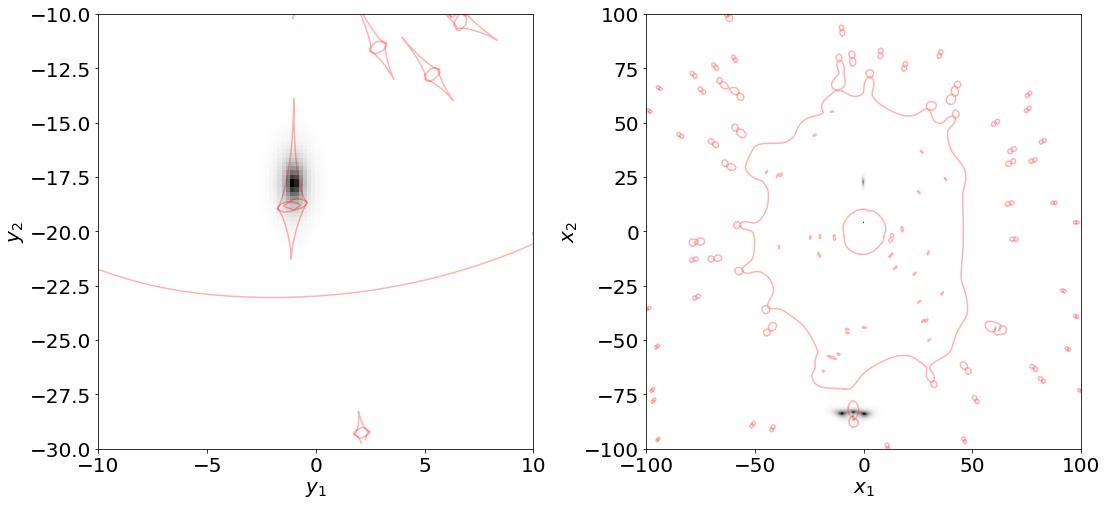

In [128]:
size=200.0
npix=1024.0
fig,ax=plt.subplots(1,2,figsize=(18,8))
df.clines(ax=ax[1],alpha=0.3)
df.caustics(ax=ax[0],alpha=0.3)
ax[0].set_xlim([-10,10])
ax[0].set_ylim([-30,-10])
ax[1].set_xlim([-size/2.,size/2.])
ax[1].set_ylim([-size/2.,size/2.])
                      
ax[1].set_xlabel('$x_1$',fontsize=20)
ax[1].set_ylabel('$x_2$',fontsize=20)
ax[0].set_xlabel('$y_1$',fontsize=20)
ax[0].set_ylabel('$y_2$',fontsize=20)
for i in range(2):
    ax[i].xaxis.set_tick_params(labelsize=20)
    ax[i].yaxis.set_tick_params(labelsize=20)
    ax[i].set_aspect('equal')

kwargs={'q': 0.5,'re': 1.0, 'pa': np.pi, 'n': 1,'ys1': -1.0, 'ys2': -17.8}
se_unlensed=sersic(size,npix,**kwargs)
se=sersic(size,npix,gl=df,**kwargs)

image_lensed=se.image
image_unlensed=se_unlensed.image
ax[0].imshow(image_unlensed,origin='lower',extent=[-se.size/2,se.size/2,-se.size/2,se.size/2],cmap='gray_r',zorder=1)
ax[1].imshow(image_lensed,origin='lower',extent=[-se.size/2,se.size/2,-se.size/2,se.size/2],cmap='gray_r',zorder=1)

As a third example, we may consider a source which is much larger than the size of the perturbers. This case is similar to that discussed in the first example. The surface brightness distribution of the image will be locally purturbed. The substructure will produce features like holes, wiggles, etc. 

In [87]:
"""
Main lens:
"""
kwargs={'theta_c': 0.0, 'norm': 0.1, 'ell': 0.4, 'pa': np.pi/4.0}
size=5.0
npix=1024.0
main_lens=psie(size=size,npix=npix,**kwargs)

"""
substructures
"""
n_pert=100

xsub=(np.random.random_sample(n_pert)-0.5)*size/2
ysub=(np.random.random_sample(n_pert)-0.5)*size/2

pot=main_lens.pot
for i in range(n_pert):
    kwargs={'theta_c': 0.0, 'norm': main_lens.norm/10.0, 'ell': 0.0}
    sub_lens=psie(x0=xsub[i],y0=ysub[i],size=size,npix=npix,**kwargs)
    pot=pot+sub_lens.pot

df1=deflector_from_potential(pot=pot,size=size,npix=npix)



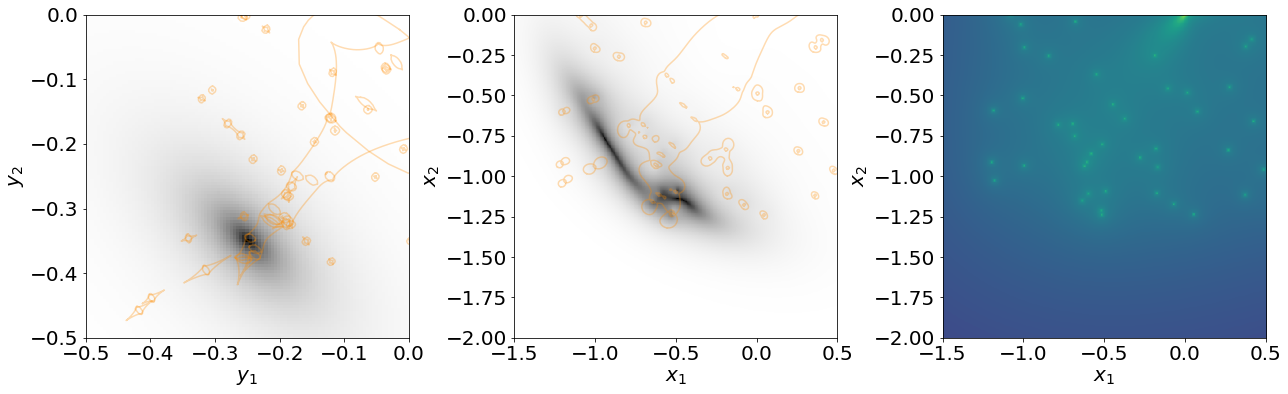

In [117]:
from matplotlib.colors import LogNorm, PowerNorm, SymLogNorm
fig,ax=plt.subplots(1,3,figsize=(18,8))
df1.clines(ax=ax[1],alpha=0.3,color='darkorange')
df1.caustics(ax=ax[0],alpha=0.3,color='darkorange')

        
ax[0].set_xlim([-0.5,0.])
ax[0].set_ylim([-0.5,0.])
ax[1].set_xlim([-1.5,0.5])
ax[1].set_ylim([-2.,0])
ax[2].set_xlim([-1.5,0.5])
ax[2].set_ylim([-2.,0])
                      
ax[1].set_xlabel('$x_1$',fontsize=20)
ax[1].set_ylabel('$x_2$',fontsize=20)
ax[2].set_xlabel('$x_1$',fontsize=20)
ax[2].set_ylabel('$x_2$',fontsize=20)
ax[0].set_xlabel('$y_1$',fontsize=20)
ax[0].set_ylabel('$y_2$',fontsize=20)
for i in range(3):
    ax[i].xaxis.set_tick_params(labelsize=20)
    ax[i].yaxis.set_tick_params(labelsize=20)
    ax[i].set_aspect('equal')

kwargs={'q': 0.5,'re': 0.2, 'pa': np.pi/4, 'n': 1.5,'ys1': -0.25, 'ys2': -0.35}
se_unlensed=sersic(size,npix,**kwargs)
se=sersic(size,npix,gl=df1,**kwargs)

image_lensed=se.image
image_unlensed=se_unlensed.image

ax[0].imshow(image_unlensed,origin='lower',extent=[-se.size/2,se.size/2,-se.size/2,se.size/2],cmap='gray_r',zorder=1)
ax[1].imshow(image_lensed,origin='lower',extent=[-se.size/2,se.size/2,-se.size/2,se.size/2],cmap='gray_r') 
ax[2].imshow(df1.convergence(),origin='lower',extent=[-se.size/2,se.size/2,-se.size/2,se.size/2],norm=LogNorm())    
plt.tight_layout()

(-2.0, 0)

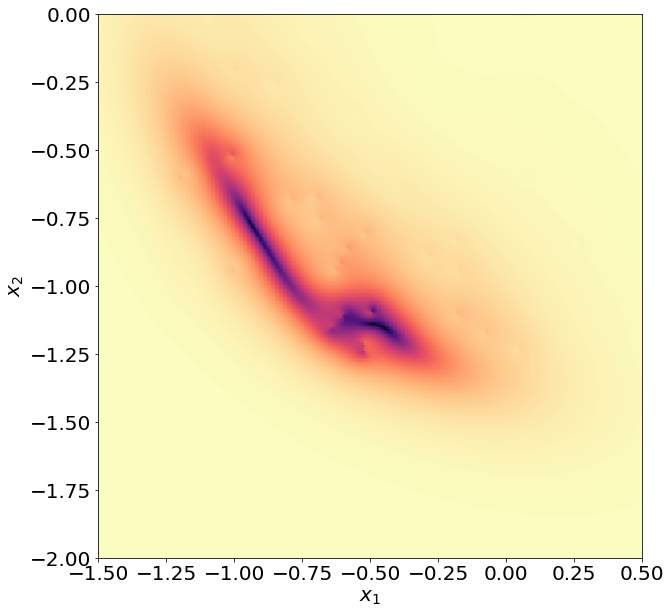

In [121]:
fig,ax=plt.subplots(1,1,figsize=(10,10))
ax.imshow(image_lensed,origin='lower',extent=[-se.size/2,se.size/2,-se.size/2,se.size/2],cmap='magma_r') 
ax.set_xlabel('$x_1$',fontsize=20)
ax.set_ylabel('$x_2$',fontsize=20)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
ax.set_aspect('equal')
ax.set_xlim([-1.5,0.5])
ax.set_ylim([-2.,0])